### ENSIMAG – Grenoble INP – UGA - Academic year 2025-2026
# Introduction to Statistical Learning and Applications ([website](https://github.com/ISLA-Grenoble/2026-main))

- Pedro L. C. Rodrigues -- `pedro.rodrigues@inria.fr`

- Isabella Costa Maia -- `isabella.costa-maia@grenoble-inp.fr`

***

### ⚠️ General guidelines for TPs

Each team shall upload its report on [Teide](https://teide.ensimag.fr/) before the deadline indicated at the course website. Please
**include the name of all members** of the team on top of your report.
The report should contain graphical representations and explanatory text. For each graph, axis names should be provided as well
as a legend when it is appropriate. Figures should be explained by a few sentences in the text. Answer to
the questions in order and refer to the question number in your report. Computations and
graphics have to be performed in `python`. The report should be written as a jupyter notebook. This is a file format that allows users to format documents containing text written in markdown and `python` instructions. You should include all of the `python` instructions that you have used in the document so that it may be possible to replicate your results.

***

# 🖥️ TP1: Analysis of prostate cancer data

A medical study done on patients with prostate cancer aims to analyze the correlation between the prostate tumor volume and a set of clinical and morphometric variables. These variables include prostate specific antigens, a biomarker for prostate cancer, and a number of clinical measures (age, prostate weight, etc). The goal of this lab is to build a regression model to predict the severity of cancer, expressed by logarithm of the tumor volume -- `lcavol` variable -- from the following predictors:
- `lpsa`: log of a prostate specific antigen
- `lweight`: log of prostate weight
- `age`: age of the patient
- `lbph`: log of benign prostatic hyperplasia amount
- `svi`: seminal vesicle invasion
- `lcp`: log of capsular penetration
- `gleason`: Gleason score (score on a cancer prognosis test)
- `pgg45`: percent of Gleason scores 4 or 5

The file `prostate.data`, available [here](https://github.com/ISLA-Grenoble/2025-main/blob/main/TP/TP1/prostate.data), contains measures of the logarithm of the tumor
volume and of the 8 predictors for 97 patients. This file also contains an additional variable, called `train`, which will
not be used and has to be removed.

## ▶️ Exercise 1: Preliminary analysis of the data (1 points)

**(a)** Download the file `prostate.data` and store it in your current folder. Read the dataset in using `pandas` as per
```
import pandas as pd
df = pd.read_csv("prostate.data", sep="\t")
```
check how to use function `df.drop` to remove the first and last columns of `df` containing useless tags.

In [57]:
import pandas as pd
df = pd.read_csv("prostate.data", sep="\t")
df.drop(df.columns[[0,-1]], axis = 1, inplace  =True)#drop first and last lines containing useless tags

**(b)** The function defined below generates scatterplots (clouds of points) between all pairs of variables, allowing us to visually analyse the correlations between all variables in the dataframe. Explain what each line of function `pairplot` does and how it affects the final plot. You can use command `help` in the `python` shell to get the documentation of each function.

``` 
# import the main plotting library for python
import matplotlib.pyplot as plt

# make a pairplot from scratch
def pairplot(df, figsize=None):
    if figsize is None:
        figsize = (7.10, 6.70)
    n_vars = df.shape[1]
    fig, ax = plt.subplots(figsize=figsize, ncols=n_vars, nrows=n_vars)
    plt.subplots_adjust(
        wspace=0.10, hspace=0.10, left=0.05, right=0.95, bottom=0.05, top=0.95)
    for i in range(n_vars):
        for j in range(n_vars):
            axij = ax[i][j]
            i_name = df.columns[i]
            j_name = df.columns[j]
            axij.set_xticks([])
            axij.set_yticks([])
            axij.margins(0.1)
            if i != j:
                axij.scatter(df[i_name], df[j_name], s=10)
            else:
                axij.text(0.5, 0.5, i_name, fontsize=10,
                              horizontalalignment='center',
                              verticalalignment='center',
                              transform = axij.transAxes)        
    return fig, ax

fig, ax = pairplot(df)
plt.show()
```

In [58]:
import matplotlib.pyplot as plt

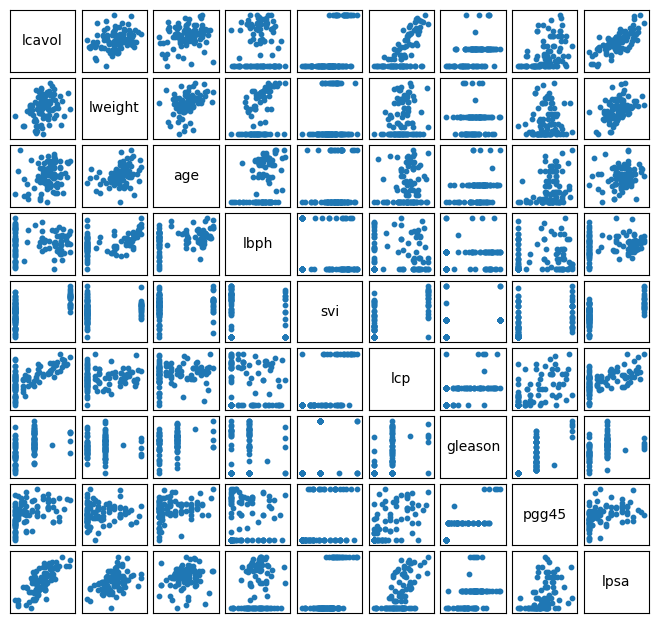

In [59]:

# make a pairplot from scratch
def pairplot(df, figsize=None):
    if figsize is None:#seeing if the figsize is not already defined
        figsize = (7.10, 6.70)#using default size
    n_vars = df.shape[1]# getting the number of variables/colonnes
    fig, ax = plt.subplots(figsize=figsize, ncols=n_vars, nrows=n_vars)#tracing  a square of a set  of subplots
    plt.subplots_adjust(
        wspace=0.10, hspace=0.10, left=0.05, right=0.95, bottom=0.05, top=0.95)#reduce spacing for compact layout
    for i in range(n_vars):#for the first variable
        for j in range(n_vars):#for  the other variable
            axij = ax[i][j]#se placer dans le plot
            i_name = df.columns[i]#name of variable i
            j_name = df.columns[j]#name of variable j
            axij.set_xticks([])#removing tick marks to reduce clutter
            axij.set_yticks([])
            axij.margins(0.1)#adding small margins so points are not cliupped
            if i != j:
                axij.scatter(df[i_name], df[j_name], s=10)#tracinf if i!=j 
            else:#if they are the same, just put the naee
                axij.text(0.5, 0.5, i_name, fontsize=10,
                              horizontalalignment='center',
                              verticalalignment='center',
                              transform = axij.transAxes)        
    return fig, ax#retourner la figuer et les axes

fig, ax = pairplot(df)
plt.show()

**(c)** Based on the generated figure, identify which variables seem the most correlated to `lcavol`. Also, infer the datatype for each of the predictors.

based on the lcavol correlation curves, the varibale seems most related to lpsa and lcp, because the correlation seems less random and more linear/usual

**(d)** Recall the formula of correlation between two vectors and implement it with `numpy`. Explain the difference of your result when compared to `df.corr()`. Change the function `pairplot`to show the correlation coefficient on the upper triangle of the subplots. (Bonus) Use locally weighted scatterplot smoothing (LOWESS) to see the trends between pairs of features with `statsmodels.nonparametric.smoothers_lowess`.

we can study the correlation expression: $\phi(x,y) = \frac{cov(x,y)}{\sigma(x)\sigma(y)}$, 
we can define the next numpy function,

In [60]:

import numpy as np

def corr(x,y):
    x = np.asarray(x)
    y = np.asarray(y)#validating representation
    x_centered = x - np.mean(x)
    y_centered = y - np.mean(y)

    num = np.sum(x_centered * y_centered)
    denom = np.sqrt(np.sum(x_centered**2) * np.sum(y_centered**2))#evaluating numerator and denominator
    
    return num/denom
print("numpy correlation :",corr(df["lcavol"], df["lpsa"]))
print("pandas correlation :",df.corr().loc["lcavol", "lpsa"])

    

numpy correlation : 0.7344603262136731
pandas correlation : 0.734460326213673


The function behave approximately the same, while df.corr treats edge cases too
Here is an addition to the pairplot function using df:

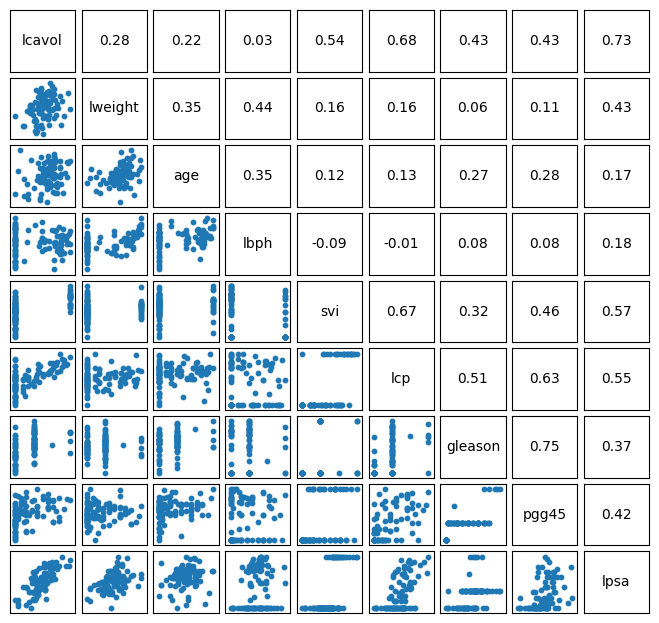

In [61]:

# make a pairplot from scratch
def pairplot(df, figsize=None):
    if figsize is None:#seeing if the figsize is not already defined
        figsize = (7.10, 6.70)#using default size
    n_vars = df.shape[1]# getting the number of variables/colonnes
    fig, ax = plt.subplots(figsize=figsize, ncols=n_vars, nrows=n_vars)#tracing  a square of a set  of subplots
    plt.subplots_adjust(
        wspace=0.10, hspace=0.10, left=0.05, right=0.95, bottom=0.05, top=0.95)#reduce spacing for compact layout
    for i in range(n_vars):#for the first variable
        for j in range(n_vars):#for  the other variable
            
            axij = ax[i][j]#se placer dans le plot
            i_name = df.columns[i]#name of variable i
            j_name = df.columns[j]#name of variable j
            axij.set_xticks([])#removing tick marks to reduce clutter
            axij.set_yticks([])
            axij.margins(0.1)#adding small margins so points are not cliupped
            if i != j:
                if i>j:
                    axij.scatter(df[i_name], df[j_name], s=10)#tracing if i!=j 
                else:
                        r = df.corr().loc[i_name, j_name]
                        axij.text(
                                0.5, 0.5, f"{r:.2f}",
                                ha="center", va="center",
                                fontsize=10,
                                transform=axij.transAxes
                            )

                
            else:#if they are the same, just put the name
                
                axij.text(0.5, 0.5, i_name, fontsize=10,
                              horizontalalignment='center',
                              verticalalignment='center',
                              transform = axij.transAxes)        
    return fig, ax#retourner la figuer et les axes

fig, ax = pairplot(df)
plt.show()

## ▶️ Exercise 2: Linear regression (7 points)

In this exercise, we will perform a multiple linear regression to build a predictive model for the `lcavol` variable. The variables `gleason` and `svi` should be considered as qualitative variables. You can declare them as such with

```
df['svi'] = df['svi'].astype("category")
df['gleason'] = df['gleason'].astype("category")
```

**(a)** Provide the mathematical equation of the regression model (note that you can use LaTeX to write equations) and define the diﬀerent parameters. 

we consider Y the vector of lcavol, we then want to write a linear model of Y as a funcrtion of other  variables, represented in vector X  including dummies $Y = X\beta + \epsilon $, where  $\epsilon$ is a gaussian with mean 0 and variance $\sigma^2I$ with svi and gleason variables as representing binary variables, so specifically with each term :
$lcavol_i = \beta_0 +\beta_1*lweight_i +\beta_2*age_i +\beta_3*lbph_i+\beta_4*lcp_i+\beta_5*ppg45_i+\beta_6*lpsa_i+ \beta_7*svi_i +\sum \gamma_{j}D_ij +\epsilon_i $; and with a gaussian error $\epsilon$, the $D_ij$ are dummy variables representing gleason, and svi is binary

**(b)** Before doing the linear regression of this TP, you will first have to handle the one-hot encoding of the categorical features of the dataframe. One way of doing this is as follows:

```
# encode the categorical features with dummy variables
df_enc = pd.get_dummies(df, dtype=np.float64)
# to drop one dummy column for each predictor
df_enc = df_enc.drop(columns=['svi_0', 'gleason_6'])
# add a column of ones to the dataframe
df_enc['intercept'] = 1
# extract the dataframe for predictors
X = df_enc.drop(columns=['lcavol'])
# get the observed values to predict
y = df['lcavol']
```

- Why did we fix a `dtype` in `pd.get_dummies`?
- Why did we drop two columns after the encoding?
- Why did we add a column of ones to the dataframe?

In [62]:
df['svi'] = df['svi'].astype("category")
df['gleason'] = df['gleason'].astype("category")

df_enc = pd.get_dummies(df, dtype=np.float64)#1- to encode cathegorical informations, we have float because of matrix multiplication

df_enc = df_enc.drop(columns=['svi_0', 'gleason_6'])#2- because of linear dependency, we don't need all the levels of svi or gleason

df_enc['intercept'] = 1#3 we added one to consider the constant term beta 0

X = df_enc.drop(columns=['lcavol'])

y = df['lcavol']

**(c)** We will use the [`statsmodels`](https://www.statsmodels.org/) package to estimate the coefficients of the multiple linear regression as per:

```
# import required package
import statsmodels.api as sm
# this line does not fit the regression model per se but only builds it
model = sm.OLS(y, X)
# now we actually fit the model, e.g. calculate all of regression parameters
results = model.fit()
```

Use command `results.sumary()` to get the statistical summary of the estimated coefficients. 

- Explain to what correspond the regression coeﬃcients for the lines related to `svi` and `gleason`. 

- What would have happened in the regression if we did not do the one-hot encoding from above?

- Comment the overall results of the regression as well.

In [63]:

# import required package
import statsmodels.api as sm
# this line does not fit the regression model per se but only builds it
model = sm.OLS(y, X)
# now we actually fit the model, e.g. calculate all of regression parameters
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 lcavol   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     18.83
Date:                Tue, 24 Feb 2026   Prob (F-statistic):           9.05e-18
Time:                        01:13:37   Log-Likelihood:                -96.825
No. Observations:                  97   AIC:                             215.7
Df Residuals:                      86   BIC:                             244.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
lweight       -0.0112      0.211     -0.053      0.958      -0.432       0.409
age            0.0248      0.011      2.205      0.030       0.002       0.047
lbph          -0.1042      0.058     -1.790      0.077      -0.220       0.012
lcp            0.4028      0.085      4.734      0.000       0.234       0.572
pgg45         -0.0094      0.005     -2.080      0.040      -0.018      -0.000
lpsa           0.5496      0.090      6.100      0.000       0.370       0.729
svi_1         -0.2204      0.256     -0.860      0.392      -0.730       0.289
gleason_7      0.3117      0.215      1.448      0.151      -0.116       0.740
gleason_8     -0.7106      0.759     -0.936      0.352      -2.219       0.798
gleason_9      0.7901      0.488      1.621      0.109      -0.179       1.759
intercept     -1.4067      0.874     -1.609      0.111      -3.145       0.332
==============================================================================
Omnibus:                        0.107   Durbin-Watson:                   2.306
Prob(Omnibus):                  0.948   Jarque-Bera (JB):                0.127
Skew:                          -0.073   Prob(JB):                        0.939
Kurtosis:                       2.900   Cond. No.                         884.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

-for the svi and gleason coefficients, these are coefficients that are relative to $svi_0$ and $gleasono_0$, it tells the the expected difference in lcavol between that gleason or svi category and Gleason 6 or svi 0 , holding other variables constant.

-if we didn't do the one hot encoding then the model would have treated gleason and svi as numerical quantitative variables , and it will assume the doifference between levels is the same, moreover  the matrix $X^TX$ would be singular and regression would be impossible

-The model explains about 65% of the variability of lcavol ($Adjusted R^2 = 0.65$). The global F-test is highly significant (p < 0.001), indicating that the regression model is statistically meaningful.

Among the predictors, age, lcp, pgg45 and lpsa are statistically significant at the 5% level since their 95% confidence intervals do not contain zero. In particular, lpsa and lcp have strong positive effects.

The variables lweight, lbph, svi, and the Gleason dummy variables are not statistically significant, as their confidence intervals include zero.

Diagnostic statistics indicate that residuals are approximately normal and no strong autocorrelation is present. However, the relatively large condition number suggests potential multicollinearity.

**(d)** Use `results.conf_int` to get confidence intervals of level 95% for all the coeﬃcients of the predictors. Comment the results.

In [64]:
results.conf_int()

,0,1
lweight,-0.431600,0.409107
age,0.002436,0.047129
lbph,-0.219914,0.011515
lcp,0.233639,0.571880
pgg45,-0.018469,-0.000419
lpsa,0.370474,0.728673
svi_1,-0.730029,0.289190
gleason_7,-0.116263,0.739616
gleason_8,-2.219087,0.797911
gleason_9,-0.179004,1.759273


The 95% confidence intervals show that age, lcp, pgg45 and lpsa have intervals that do not contain zero, indicating statistically significant effects at the 5% level.

The other variables (lweight, lbph, svi and the Gleason dummies) have confidence intervals containing zero, meaning their effects are not statistically significant.

Some intervals, especially for the Gleason categories, are quite wide, indicating a lack of precision in the estimates, possibly due to variability or multicollinearity. However the interval of lbph may contain 0, but it ius close to excluding it

**(e)** What can you say about the eﬀects of the `lpsa` variable? Relate your answer to the $p$-value of a hypothesis test and a confidence interval. You can use `results.pvalues`.

In [65]:
results.pvalues

lweight      9.577075e-01
age          3.014993e-02
lbph         7.695609e-02
lcp          8.577858e-06
pgg45        4.047741e-02
lpsa         2.939241e-08
svi_1        3.922717e-01
gleason_7    1.512950e-01
gleason_8    3.516744e-01
gleason_9    1.087313e-01
intercept    1.113676e-01
dtype: float64

The estimated coefficient of lpsa is approximately 0.55, indicating that, holding other variables constant, a one-unit increase in lpsa increases lcavol by about 0.55 units on average.

The p-value associated with lpsa is extremely small (p = 2.939241e-08 < 0.001), so we reject the null hypothesis $H_0:\beta_{lpsa}=0$ at the 5% significance level.

The 95% confidence interval [0.370, 0.729] does not contain zero and is entirely positive, confirming the statistical significance of the effect.

Therefore, lpsa has a strong and statistically significant positive effect on lcavol.

**(f)** Implement yourself a function that calculates the values of the parameters and their corresponding $p$-values. Bonus: explain why `numpy.linalg.inv` is not necessarily the best choice for estimating the parameters as compared to `numpy.linalg.solve`.

In [66]:
import numpy as np
from scipy import stats

def Ols(X,y):
    X = np.asarray(X)#converting from pandas to numpy
    y = np.asarray(y)
    n, p = X.shape
    #calculate beta
    XtX = X.T @ X
    XtX_inv = np.linalg.inv(XtX)
    beta_hat = XtX_inv@X.T@y

    #calculating epsilons
    eps = y -X@beta_hat

    #variance
    sigma_2 = (eps.T@eps)/(n-p)
    var_beta = sigma_2*XtX_inv

    #standard error
    stde_beta = np.sqrt(np.diag(var_beta))

    #student t values
    t_vals = beta_hat / stde_beta
    p_vals = 2*(1- stats.t.cdf(np.abs(t_vals),df = n-p))

    return beta_hat, stde_beta, t_vals, p_vals
#using numpy.linalg.inv is not optimal since it may introduce some numercal instability and computational inefficiency relative to np.linalg.solve

**(g)** Plot the predicted values of `lcavol` as a function of the actual values. For this, you can can use `results.get_prediction` to get predictions over `X` and then get its `predicted_mean` attribute.

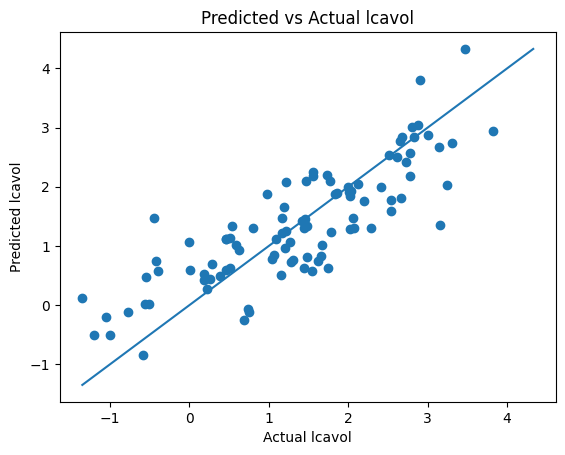

In [67]:
#getting predicted values
pred = results.get_prediction(X)
y_pred = pred.predicted_mean

#plot
plt.figure()
plt.scatter(y, y_pred)
plt.xlabel("Actual lcavol")
plt.ylabel("Predicted lcavol")
plt.title("Predicted vs Actual lcavol")

# plotting 45 degrees line for reference
min_val = min(y.min(), y_pred.min())
max_val = max(y.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val])

plt.show()

**(h)** Plot the histogram of residuals as well as their qq-plot using `statsmodels` function `qqplot`. Can we admit that the residuals are normally distributed? Compute the residual sum of squares (RSS).

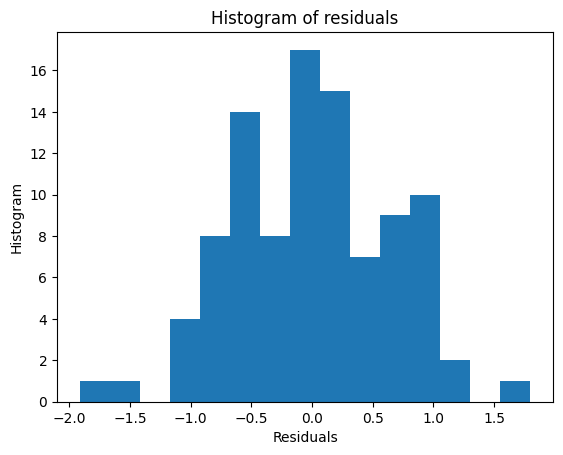

In [68]:
residuals = results.resid
plt.figure()
plt.hist(residuals, bins = 15
        )
plt.xlabel("Residuals")
plt.ylabel("Histogram")
plt.title("Histogram of residuals")
plt.show()

<Figure size 640x480 with 0 Axes>

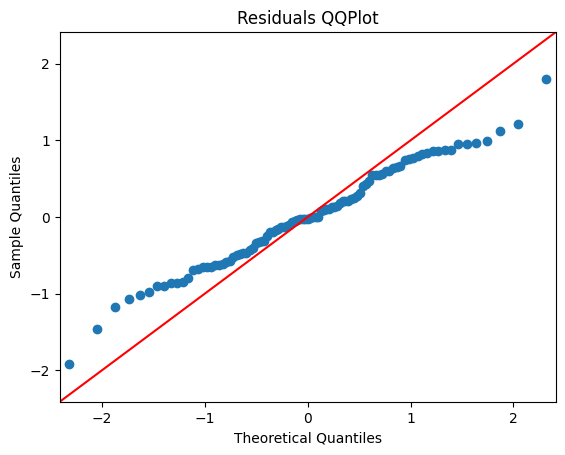

In [69]:
##QQplot
import statsmodels.api as sm

plt.figure()
sm.qqplot(residuals, line  = '45')
plt.title("Residuals QQPlot")
plt.show()

In [70]:
#RSS
rss = sum(residuals**2)
rss/(len(y) - 10) #sigma**2

0.4806214782533948

by observing the graph and histogram and rss, we can see that we can't reject the normal hypothesis of residuals and their shape,  and assuming they are normal is reasonable

**(i)** What happens if predictors `lpsa` and `lcp` are removed from the multiple linear regression model? Note that you can pass a list of strings to `df.columns.drop` method.

In [71]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 lcavol   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     18.83
Date:                Tue, 24 Feb 2026   Prob (F-statistic):           9.05e-18
Time:                        01:13:38   Log-Likelihood:                -96.825
No. Observations:                  97   AIC:                             215.7
Df Residuals:                      86   BIC:                             244.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
lweight       -0.0112      0.211     -0.053      0.958      -0.432       0.409
age            0.0248      0.011      2.205      0.030       0.002       0.047
lbph          -0.1042      0.058     -1.790      0.077      -0.220       0.012
lcp            0.4028      0.085      4.734      0.000       0.234       0.572
pgg45         -0.0094      0.005     -2.080      0.040      -0.018      -0.000
lpsa           0.5496      0.090      6.100      0.000       0.370       0.729
svi_1         -0.2204      0.256     -0.860      0.392      -0.730       0.289
gleason_7      0.3117      0.215      1.448      0.151      -0.116       0.740
gleason_8     -0.7106      0.759     -0.936      0.352      -2.219       0.798
gleason_9      0.7901      0.488      1.621      0.109      -0.179       1.759
intercept     -1.4067      0.874     -1.609      0.111      -3.145       0.332
==============================================================================
Omnibus:                        0.107   Durbin-Watson:                   2.306
Prob(Omnibus):                  0.948   Jarque-Bera (JB):                0.127
Skew:                          -0.073   Prob(JB):                        0.939
Kurtosis:                       2.900   Cond. No.                         884.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:

X_simp = X.drop(columns=['lpsa','lcp'])#dropping these two

reduced_model = sm.OLS(y, X_simp)
results_reduced = reduced_model.fit()

results_reduced.summary()
#signifcance  diminishes when p grows


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 lcavol   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.381
Method:                 Least Squares   F-statistic:                     8.390
Date:                Tue, 24 Feb 2026   Prob (F-statistic):           2.11e-08
Time:                        01:13:39   Log-Likelihood:                -125.58
No. Observations:                  97   AIC:                             269.2
Df Residuals:                      88   BIC:                             292.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
lweight        0.5850      0.259      2.257      0.026       0.070       1.100
age            0.0073      0.015      0.497      0.621      -0.022       0.036
lbph          -0.0746      0.077     -0.967      0.336      -0.228       0.079
pgg45         -0.0004      0.006     -0.076      0.939      -0.012       0.011
svi_1          1.0246      0.271      3.774      0.000       0.485       1.564
gleason_7      0.8007      0.274      2.918      0.004       0.255       1.346
gleason_8      0.6869      0.960      0.715      0.476      -1.221       2.595
gleason_9      1.1726      0.644      1.820      0.072      -0.108       2.453
intercept     -1.9717      1.159     -1.701      0.092      -4.275       0.332
==============================================================================
Omnibus:                        0.297   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.862   Jarque-Bera (JB):                0.473
Skew:                          -0.013   Prob(JB):                        0.789
Kurtosis:                       2.659   Cond. No.                         882.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""


After removing lpsa and lcp, the $R^2$ decreases substantially (from about 0.69 to 0.43), indicating a significant loss in explanatory power. The overall F-statistic also decreases. This confirms that lpsa and lcp were major contributors to the model.

Interestingly, some variables such as lweight, svi, and gleason_7 become statistically significant in the reduced model. This is likely due to correlations between predictors, as the explanatory power of the removed variables is partially absorbed by the remaining ones.

The increase in AIC and BIC further indicates that the reduced model provides a worse fit compared to the full model.

## ▶️ Exercise 3: Best subset selection (5 points)

A regression model that uses $k$ predictors is said to be of size $k$. For instance, 

$$
\texttt{lcavol} = \beta_1 \texttt{lpsa} + \beta_0 + \varepsilon \quad \text{and} \quad \texttt{lcavol} = \beta_1 \texttt{lweight} + \beta_0 + \varepsilon
$$

are models of size one. The regression model without any predictor $\texttt{lcavol} = \beta_0 + \varepsilon$ is a model of size 0.

The goal of this exercise is to select the best model of size $k$ for each $k \in \{0, \dots, 8\}$.

**(a)** Compute the residual sums of squares (RSS) for all models of size $k = 2$. Which model has the smallest RSS? Note that you can use a generator [`itertools.combination`](https://docs.python.org/3/library/itertools.html#itertools.combinations) to automatize for you all the combinations of $k$ elements among $n$.

**(b)** For each value of $k \in \{0, \dots, 8\}$, select the set of predictors that minimizes the RSS. Plot these values as a function of $k$. Provide the names of the selected predictors for each value of $k$.

**(c)** Do you think that minimizing the residual sum of squares is well suited to select the optimal size for the regression models? Justify your answer using what you've learned in class.

In [73]:
import itertools
import statsmodels.api as sm

names = [i for i in df.columns if i != 'lcavol']
combinations = list(itertools.combinations(names, 2))
opt_rss = float('inf')

for c in combinations:
    X = df[list(c)]
    X = sm.add_constant(X)
    y = df['lcavol']
    model = sm.OLS(y, X)
    results = model.fit()
    rss = sum(results.resid**2)  
    if rss < opt_rss:
        opt_rss = rss
        best_combo = c

print("Best combination:", best_combo)

Best combination: ('lcp', 'lpsa')


In [74]:
results ={}
names = [i for i in df.columns if i != 'lcavol']
for k in range(0,9):
    combinations = list(itertools.combinations(names, k))
    opt_rss = float('inf')
    
    for c in combinations:
        X = df[list(c)]
        X = sm.add_constant(X)
        y = df['lcavol']
        model = sm.OLS(y, X)
        result = model.fit()
        rss = sum(result.resid**2)  
        if rss < opt_rss:
            opt_rss = rss
            best_combo = c
    results[k]= (opt_rss, best_combo)


#for k in results:
#    print("k =", k)
#    print("RSS =", results[k][0])
#    print("Predictors =", results[k][1])
#    print()




## ▶️ Exercise 4: Split-validation (5 points)

You have now found the best model for each of the nine possible model sizes. In the following, we wish to compare these nine diﬀerent regression models.

**(a)** Give a brief overview of split-validation: how it works? Why it is not subject to the same issues raised in
the item (c) of the previous Exercise?

**(b)** Use function `train_test_split` from the `sklearn` package to split the dataset into a training and a validation (or test) partition. You can set `test_size=0.3`. For each of the nine models from before (i.e. those that minimized the RSS for each size $k$), compute the mean prediction error calculated over the samples from the test set and compare it to its corresponding mean training error. Plot a curve for each of these error as a function of size $k$. 

**(c)** Based on the previous results, choose the best model for this dataset, giving the parameter estimates for the model trained on the whole dataset (i.e. without splitting), and explain your choice.

**(d)** What is the main limitation of split-validation ? Illustrate this issue on the cancer dataset. What could
you do to address this problem? Code such alternative method and comment the result. Note that `sklearn` can provide you with many choices. See [here](https://scikit-learn.org/stable/model_selection.html) for more information.

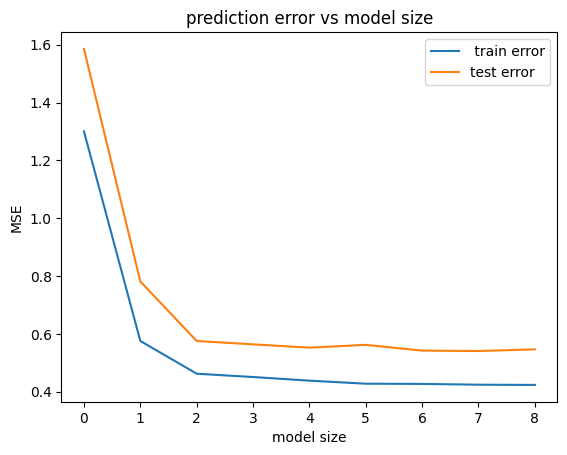

In [75]:
# Question a :

# Split-validation is a technique used to evaluate the performance of a model by splitting the dataset into two parts: a training set and a set for testing.


# Question b :
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


train_errors = []
test_errors = []
ks = sorted(results.keys())

for k in ks:
    predictors = list(results[k][1])
    X_train_k = X_train[predictors]
    X_test_k = X_test[predictors]
  
    X_train_k = sm.add_constant(X_train_k)
    X_test_k = sm.add_constant(X_test_k)

    model = sm.OLS(y_train, X_train_k)
    res = model.fit()

    y_train_pred = res.predict(X_train_k)
    y_test_pred = res.predict(X_test_k)
 
    train_mse = np.mean((y_train - y_train_pred)**2)
    test_mse = np.mean((y_test - y_test_pred)**2)
    train_errors.append(train_mse)
    test_errors.append(test_mse)

plt.figure()
plt.plot(ks, train_errors, label=' train error')
plt.plot(ks, test_errors, label='test error ')
plt.xlabel('model size')
plt.ylabel('MSE')
plt.title('prediction error vs model size')
plt.legend()
plt.show()


Question C :

we have the set of best models for each k sorted by the rss , so to get the best model over all we get simply results[7]

In [76]:

bes_preditctors = list(results[7][1])

X_best = df[bes_preditctors]
X_best = sm.add_constant(X_best)
y_best = df['lcavol']
model_best = sm.OLS(y_best, X_best)
results_best = model_best.fit()


print(results_best.summary())

                            OLS Regression Results                            
Dep. Variable:                 lcavol   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     26.55
Date:                Tue, 24 Feb 2026   Prob (F-statistic):           2.72e-19
Time:                        01:13:40   Log-Likelihood:                -98.383
No. Observations:                  97   AIC:                             212.8
Df Residuals:                      89   BIC:                             233.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.5000      1.117     -2.238      0.0



The main limitation of split-validation is its strong dependence on how the dataset is split. Since the split is random, it can introduce inefficiency and variability in the results. This means that the performance estimates may change significantly depending on which samples are assigned to the training and test sets. We can illustrate this by comparing the statistical summaries for different training splits. To address this problem, a more robust alternative is to use cross-validation, which averages the results over multiple splits and reduces the impact of randomness.

## ▶️ Exercise 5: Conclusion (2 points)

What is your conclusion about the choice of the best model to predict `lcavol` ? Comment your results.